In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

#### Combine All Sales Data

In [3]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir('./Sales_Data')]

year_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    year_data = pd.concat([year_data,df])

year_data.to_csv("./Sales_Data/2019_Year_Sales.csv", index = False)

#### Read Combined Data File

In [4]:
year_data = pd.read_csv("./Sales_Data/2019_Year_Sales.csv")
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Data

#### Remove Empty Rows

In [5]:
year_data = year_data.dropna(how='all')
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Clean Non-Date Data From Order Date Column

In [6]:
year_data = year_data[year_data['Order Date'].str[0:2]!='Or']

#### Change Quantity Order and Price Each Column to Numeric Column Type

In [7]:
year_data['Quantity Ordered'] = pd.to_numeric(year_data['Quantity Ordered'])
year_data['Price Each'] = pd.to_numeric(year_data['Price Each'])

#### Create a Month Column

In [8]:
year_data['Month']= pd.to_numeric(year_data['Order Date'].str[0:2])
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a Sales Column

In [9]:
year_data['Sales'] = year_data['Quantity Ordered'] * year_data['Price Each']

#### Add a City Column

In [10]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

year_data['City'] = year_data['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_state(x)}")

#### Change Order Date Column to Date Time Type

In [11]:
year_data['Order Date'] = pd.to_datetime(year_data['Order Date'])

#### Create Hour and Minute Columns

In [12]:
year_data['Hour'] = year_data['Order Date'].dt.hour
year_data['Minute'] = year_data['Order Date'].dt.minute

## Month With Best Sales

#### Monthly Sales Sorted By Most Sales to Least

In [13]:
results = year_data.groupby('Month').sum()
results.sort_values(by='Sales', ascending=False)

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
12,224912,36707323.28,36907546.72,2879824,5864656
10,181624,29724438.64,29893815.04,2325200,4787496
4,164464,26941368.16,27125361.92,2098072,4353488
11,158384,25444805.44,25596825.60,2038920,4145848
5,149336,25081001.04,25220854.00,1910240,3903192
3,136040,22329662.64,22456803.04,1751752,3580472
7,128576,21060316.48,21182206.08,1649352,3338792
6,122024,20496204.88,20622418.08,1564224,3219488
8,107584,17842763.36,17955743.04,1378312,2830856


##### We see that December has the most sales and January has the least sales

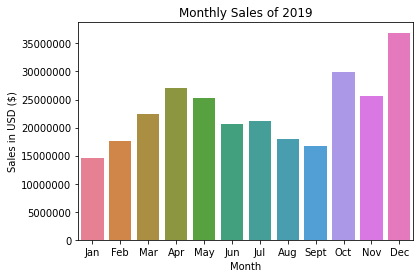

In [14]:
month_label = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'] 
ax = sns.barplot(x=month_label, y=results['Sales'], hue = month_label)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False)) #We want the full value of sales to be shown
ax.ticklabel_format(style='plain', axis='y')
plt.xlabel('Month')
plt.xticks(month_label)
plt.ylabel('Sales in USD ($)')
plt.title('Monthly Sales of 2019')
plt.show()

## City With Most Sales

#### Sales For Each City Sorted By Most Sales to Least

In [15]:
results = year_data.groupby(['City']).sum()
results.sort_values(by='Sales', ascending=False)

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
San Francisco CA,401912,65691693.92,2524160,66097631.28,5146120,10555816
Los Angeles CA,266312,43371481.84,1666600,43620566.40,3419552,6933104
New York City NY,223456,37082966.64,1405928,37314539.44,2861568,5868784
Boston MA,180224,29099278.16,1128896,29293136.08,2305800,4723536
Atlanta GA,132816,22239265.60,838352,22363988.64,1714112,3543456
Dallas TX,133840,22021022.56,836960,22143803.20,1715120,3481240
Seattle WA,132424,21866368.08,839528,21982043.84,1706336,3490944
Portland OR,90424,14884465.76,564968,14965858.72,1155368,2364264
Austin TX,89224,14478988.88,558632,14556654.00,1135568,2312480


##### We see that San Francisco CA has the most sales and Portland ME has the least sales

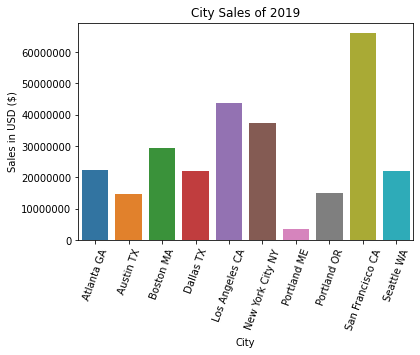

In [16]:
city_label = [city for city, df in year_data.groupby('City')] #Keep the order of cities as the order in the groupby when making axis
ax = sns.barplot(x=city_label, y=results['Sales'], hue = city_label)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False)) #We want the full value of sales to be shown
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=70)
plt.xlabel('City')
plt.xticks(city_label)
plt.ylabel('Sales in USD ($)')
plt.title('City Sales of 2019')
plt.show()

What Time Should Advertisements Be Shown To Maximize the Likelihood of Customer's Buying Products?

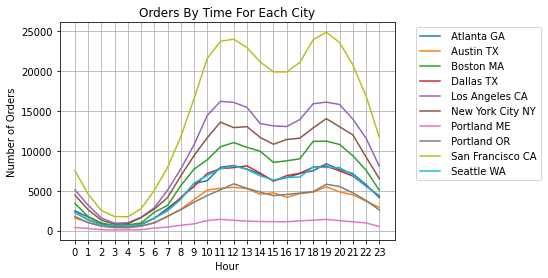

In [64]:
hours = [hour for hour, df in year_data.groupby(['Hour'])]
hour_data = year_data.groupby(['City','Hour']).count().reset_index()

sns.lineplot(x='Hour', y='Product',data = hour_data, hue='City')

plt.xlabel('Hour')
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.title('Orders By Time For Each City')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

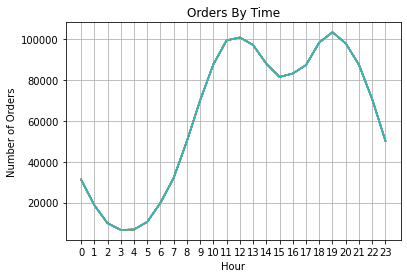

In [37]:
#hours = [hour for hour, df in year_data.groupby(['Hour'])]
#hour_data = year_data.groupby('Hour').count().reset_index()

plt.plot(hours, year_data.groupby(['Hour']).count())

plt.xlabel('Hour')
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.title('Orders By Time')
plt.grid()
plt.show()

##### Based on the chart's peak time for orders, I would recommend advertising at around 11 am or 7 pm for maximal effect.

### Products That Are Most Often Sold Together

In [20]:
df = year_data[year_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27,"Wired Headphones,Wired Headphones,Wired Headph..."
